5.26224686192066


C:\Users\achen\AppData\Local\Temp\ipykernel_18060\2499618989.py:100: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data != []:
C:\Users\achen\AppData\Local\Temp\ipykernel_18060\2499618989.py:104: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data != [] and litos_time and i != 0:


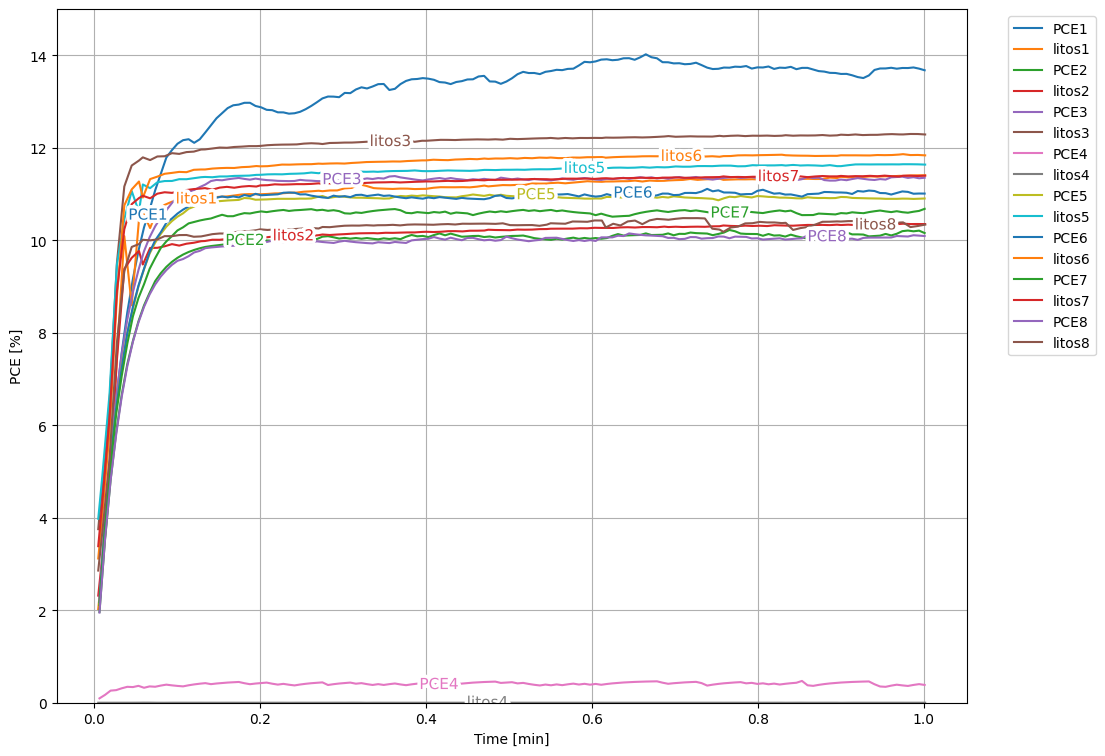

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
from matplotlib.font_manager import FontProperties
import os
import sys

litos_directory = ""
litos_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-05 --Litos vs Stability Setup Test MPPT Working\nov5_2024 tests\nov5_2024 test 2\devices"

all_files = []

if litos_directory != "":
    for root, dirs, files in os.walk(litos_directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                all_files.append(file_path)


litos_pce = []
litos_time = []

# Process each file
for file_path in all_files:
    if "_3_0" in file_path:
        try:
            data = np.genfromtxt(
                file_path,
                delimiter=',',
                comments='#',
                skip_header=0,
                encoding='cp1252'  # Specify the correct encoding
            )
            pce = (data[:, 1] * data[:, 2] /1000) / (0.1*0.128)*100
            # data_with_pce= np.column_stack((data, pce))
            litos_time.append(data[:,0])
            litos_pce.append(pce)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

litos_pce = litos_pce[::-1]
litos_time = litos_time[::-1]
litos_time = [val/60 for val in litos_time]
data = []

ss_file_path = ""
ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-05 --Litos vs Stability Setup Test MPPT Working\Nov-05-2024 17_28_24 test2\Nov-05-2024 17_29_01ID2PnO.csv"
if ss_file_path != "":
    arr = np.loadtxt(ss_file_path,
                        delimiter=",",
                        dtype=str)


    headers = arr[6,:]
    header_dict = {value: index for index, value in enumerate(headers)}
    pce_indicies = [header_dict[value] for value in header_dict if "PCE" in value]
    arr = arr[7:, :]

    time = np.array(arr[:,header_dict["Time"]]).astype('float')
    time/=60
    pce_list = np.array(arr)
    pce_list = pce_list[:, pce_indicies]
    # pce_list = pce_list[:,0:-1]
    for i in range(len(pce_list)):
        pce_list[i] = [float(j) if j != " ovf" else 0.0 for j in pce_list[i]]
        pce_list[i] = [float(j) if j != "nan" else 0.0 for j in pce_list[i]]

    pce_list = pce_list.astype(float)

    data = pce_list #np.array(data).T
    # data *= 2.048 # comment line if not using mask

# min_time = min(time)*0.99
# max_time = max(time)*1.01
plot_size = (12,8)
min_pce = 0
max_pce = 15

plt.figure(figsize=plot_size)
# plt.xlim(min_time,max_time)
plt.ylim(bottom = min_pce, top = max_pce)
plt.xlabel('Time [min]')
plt.grid()

plt.ylabel('PCE [%]')
plt.subplots_adjust(left=0.086,
                    bottom=0.06,
                    right=0.844,
                    top=0.927,
                    wspace=0.2,
                    hspace=0.2)

errors = []

for i in range(8):
    lineName = "PCE" + str(i + 1)
    # print(np.array(pce_list[i]))
    if data != []:
        plt.plot(time,data[:,i], label = lineName)
    if litos_time:
        plt.plot(litos_time[i], litos_pce[i], label = "litos" + str(i+1))
    if data != [] and litos_time and i != 0:
        second_half = data[:,i][len(data[:,i]) // 2:]
        average_second_half = np.mean(second_half)

        second_half_litos = litos_pce[i][len(litos_pce[i]) // 2:]
        average_second_half_litos = np.mean(second_half_litos)

        percent_error = abs(average_second_half - average_second_half_litos) / abs(average_second_half_litos) * 100
        if percent_error < 100:
            errors.append(abs(average_second_half - average_second_half_litos) / abs(average_second_half_litos) * 100)

print(np.mean(errors))

lines = plt.gca().get_lines()
x_min, x_max = plt.xlim()
num_lines = len(lines)
xvals = np.linspace(x_min + 0.1 * (x_max - x_min), x_max - 0.1 * (x_max - x_min), num_lines)
bold_font = FontProperties(weight='medium')
labelLines(
    lines,
    xvals=xvals,
    zorder=2.5,
    align=False,
    fontsize=11,
    fontproperties=bold_font
)
plt.legend(bbox_to_anchor=(1.15, 1))


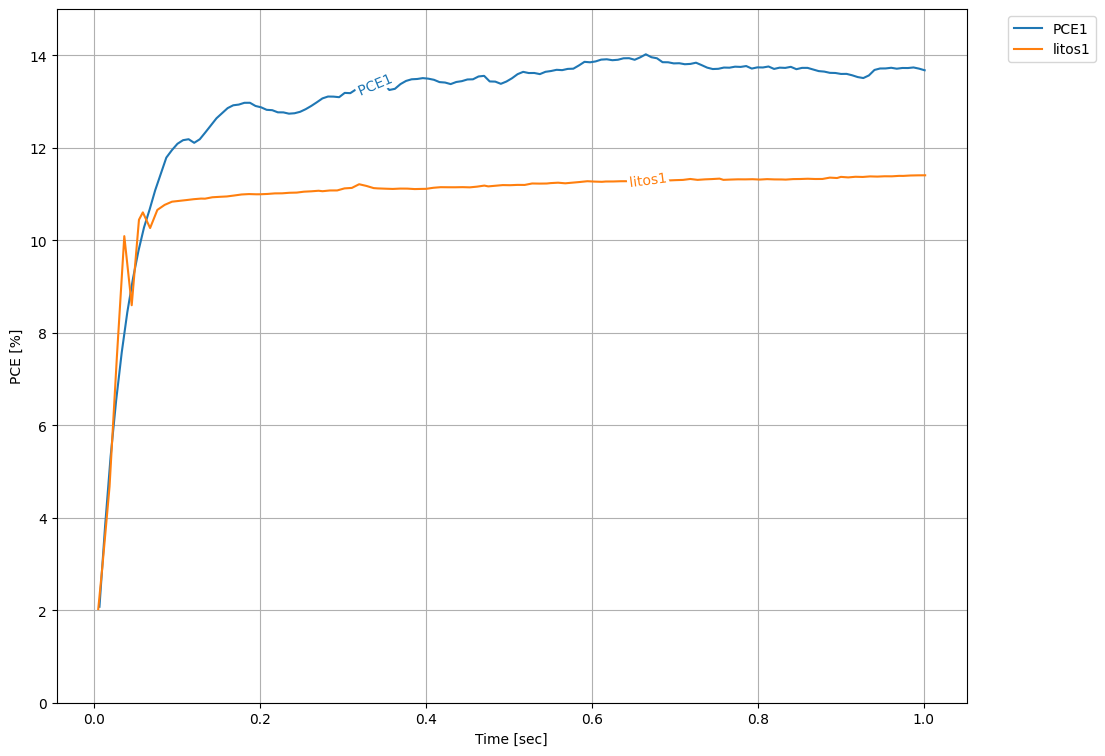

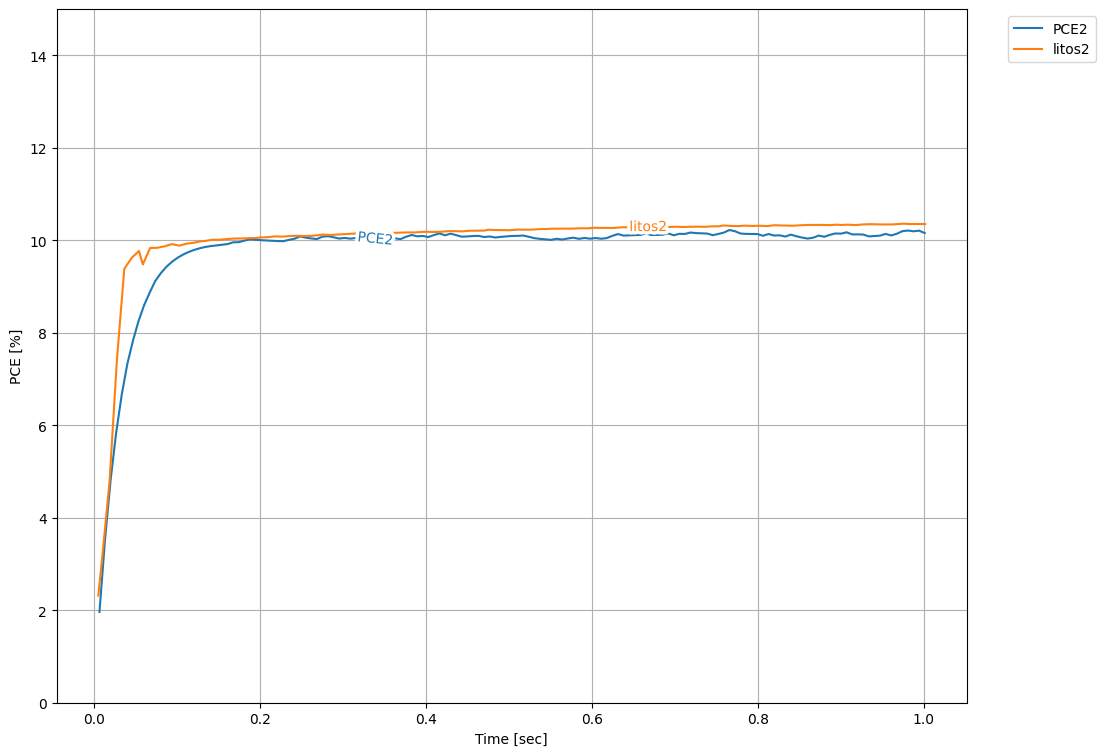

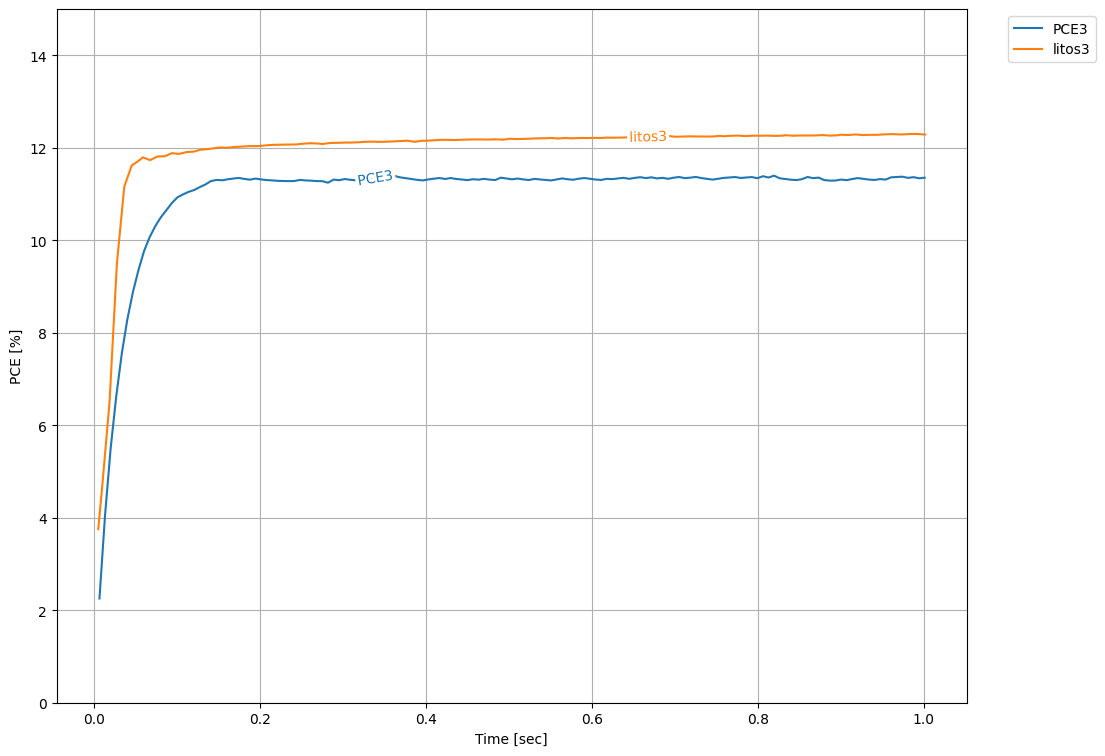

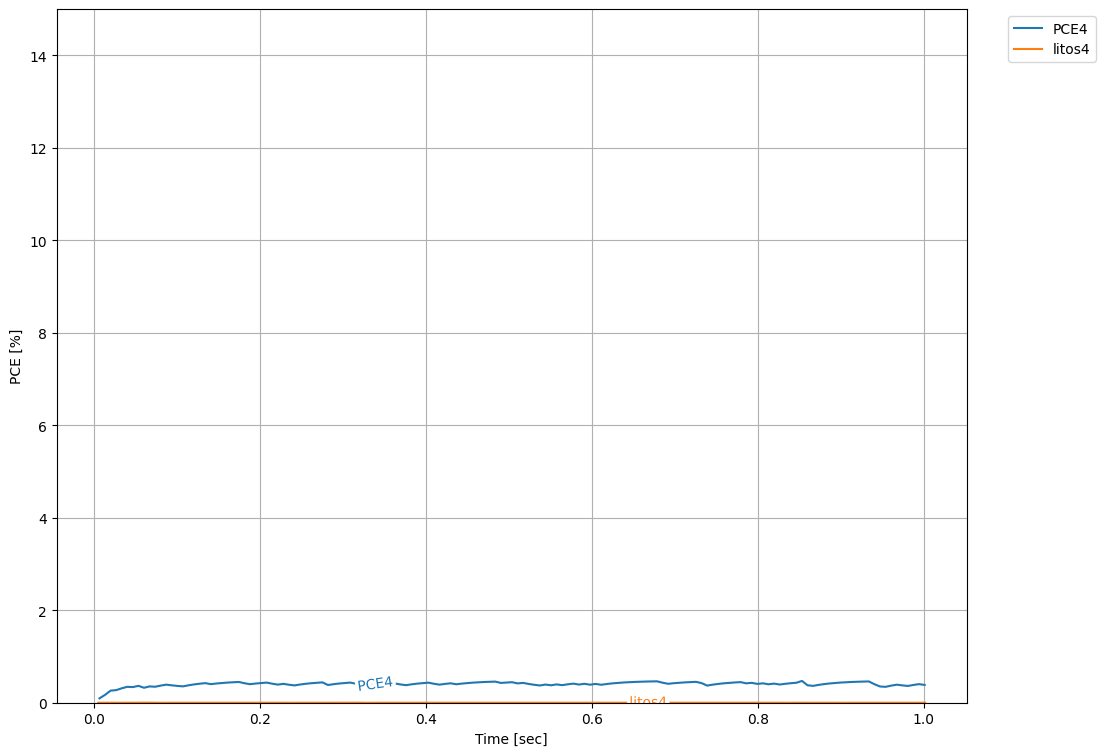

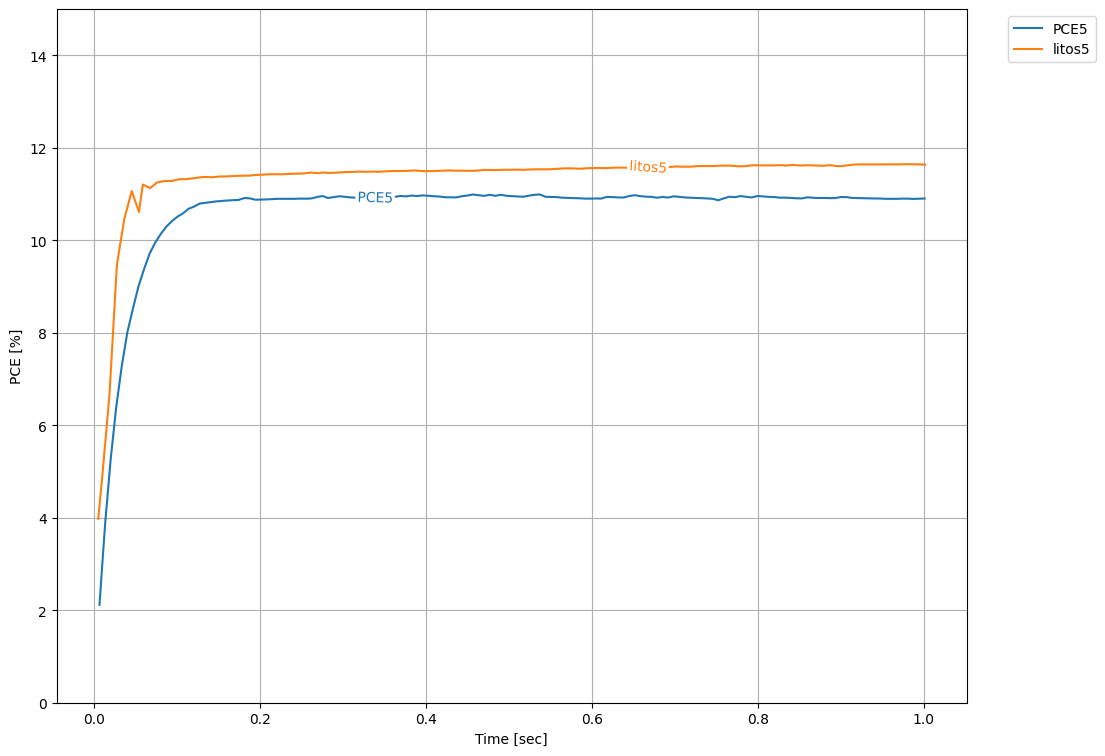

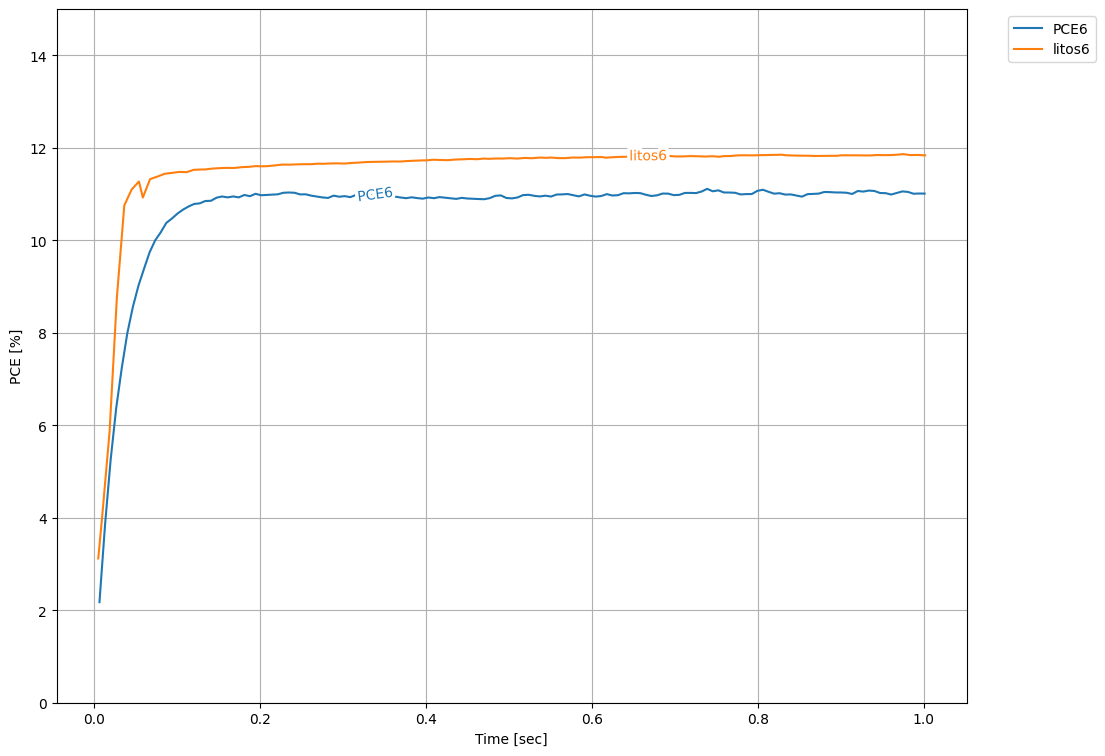

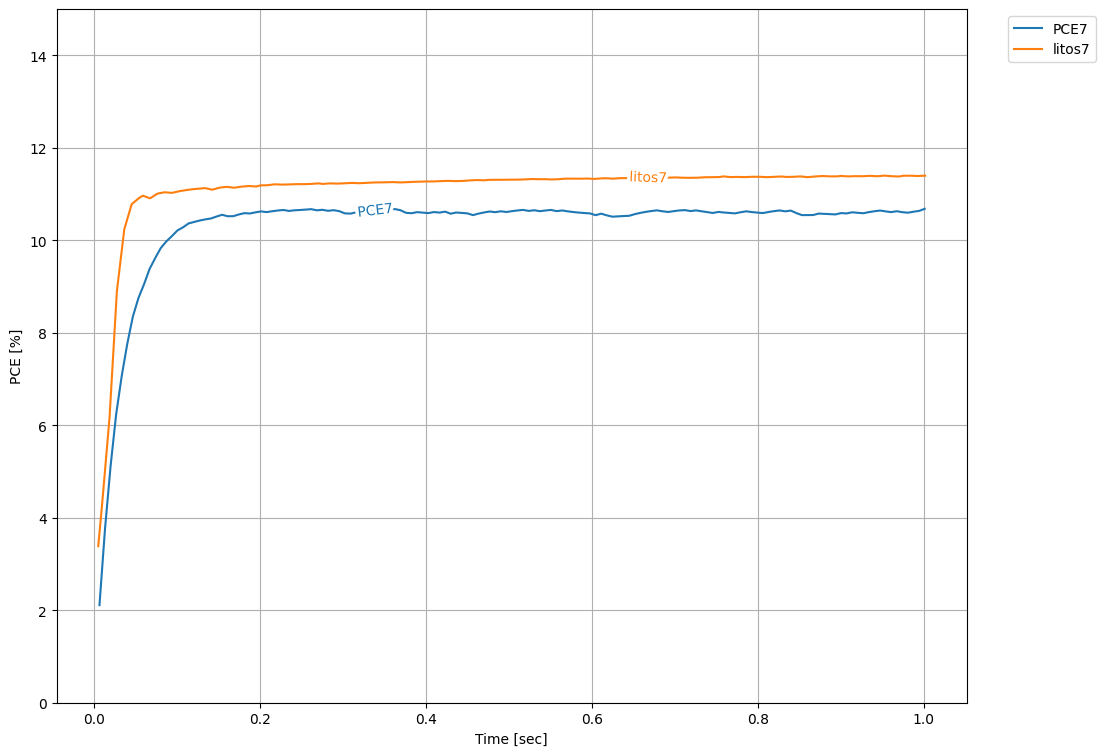

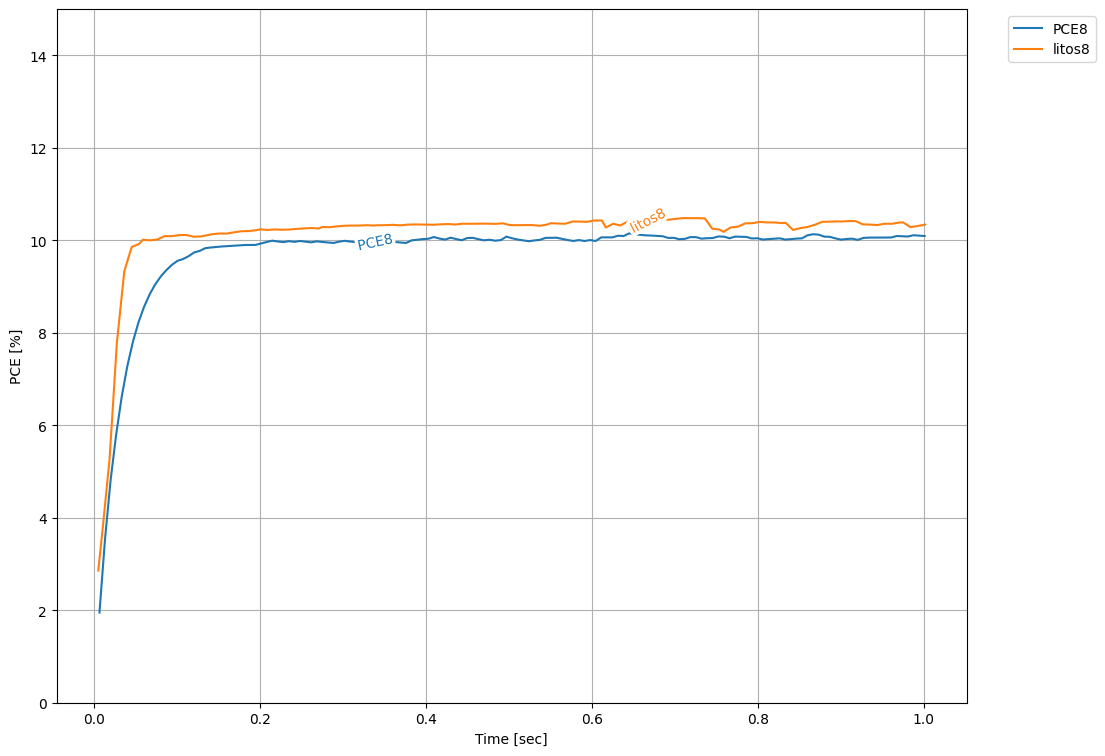

In [7]:
for i in range(8):
    plt.figure(figsize=plot_size)
    plt.ylim(bottom = -0, top = max_pce)
    plt.xlabel('Time [sec]')
    plt.grid()

    plt.ylabel('PCE [%]')
    plt.subplots_adjust(left=0.086,
                        bottom=0.06,
                        right=0.844,
                        top=0.927,
                        wspace=0.2,
                        hspace=0.2)


    lineName = "PCE" + str(i + 1)
    # print(np.array(pce_list[i]))
    plt.plot(time,data[:,i], label = lineName)
    plt.plot(litos_time[i], litos_pce[i], label = "litos" + str(i+1))

    labelLines(plt.gca().get_lines(), zorder=2.5)
    plt.legend(bbox_to_anchor=(1.15, 1))


nan


c:\Users\achen\miniforge3\envs\stabilitySetup\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\achen\miniforge3\envs\stabilitySetup\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


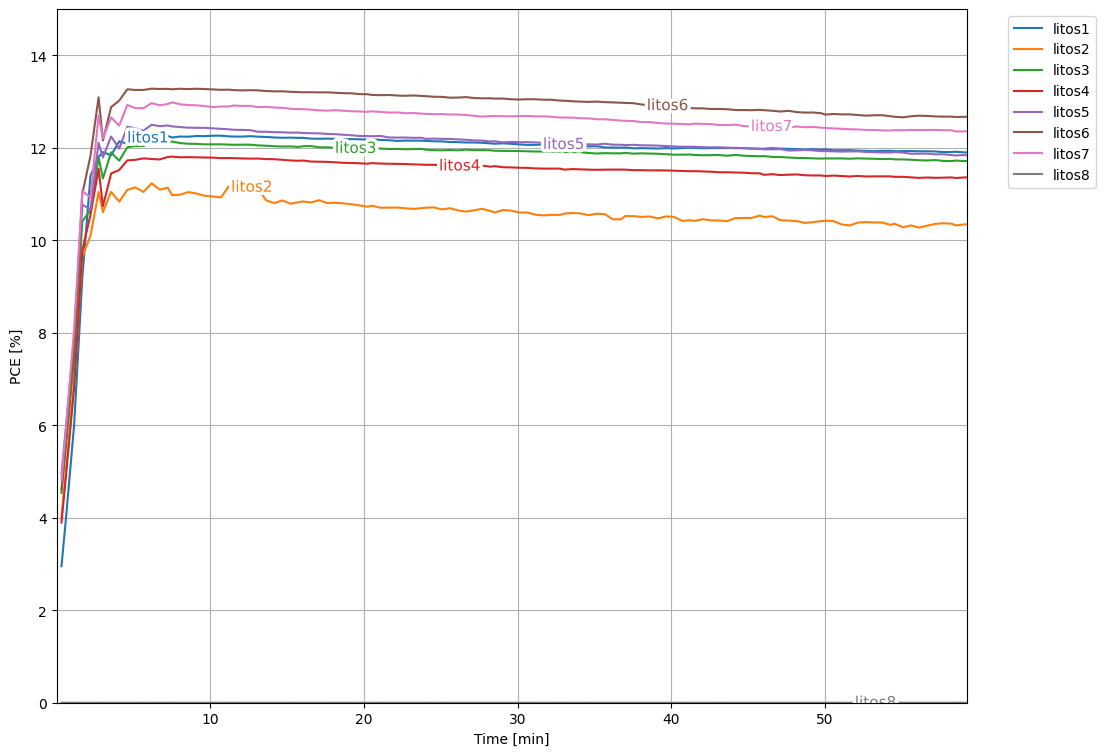

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
from matplotlib.font_manager import FontProperties
import os
import sys

litos_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --litos vs stability setup long test\nov6_2024 test 1\devices"
# litos_directory = ""

all_files = []

if litos_directory != "":
    for root, dirs, files in os.walk(litos_directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                all_files.append(file_path)


litos_pce = []
litos_time = []

# Process each file
for file_path in all_files:
    if "_3_0" in file_path:
        try:
            data = np.genfromtxt(
                file_path,
                delimiter=',',
                comments='#',
                skip_header=0,
                encoding='cp1252'  # Specify the correct encoding
            )
            pce = (data[:, 1] * data[:, 2] /1000) / (0.1*0.128)*100
            # data_with_pce= np.column_stack((data, pce))
            litos_time.append(data[:,0])
            litos_pce.append(pce)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

litos_pce = litos_pce[::-1]
litos_time = litos_time[::-1]
data = []

# ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Nov-06-2024 13_50_53\Nov-06-2024 13_50_53ID2PnO.csv"
ss_file_path = ""
if ss_file_path != "":
    arr = np.loadtxt(ss_file_path,
                        delimiter=",",
                        dtype=str)
    plot_size = (12,8)

    headers = arr[6,:]
    header_dict = {value: index for index, value in enumerate(headers)}
    pce_indicies = [header_dict[value] for value in header_dict if "PCE" in value]
    arr = arr[7:, :]

    time = np.array(arr[:,header_dict["Time"]]).astype('float')
    time/=60
    pce_list = np.array(arr)
    pce_list = pce_list[:, pce_indicies]
    # pce_list = pce_list[:,0:-1]
    for i in range(len(pce_list)):
        pce_list[i] = [float(j) if j != " ovf" else 0.0 for j in pce_list[i]]
        pce_list[i] = [float(j) if j != "nan" else 0.0 for j in pce_list[i]]

    pce_list = pce_list.astype(float)

    data = pce_list #np.array(data).T
    # data *= 2.048 # comment line if not using mask

min_time = min(time)*0.99
max_time = max(time)*1.01
min_pce = 0
max_pce = 15

plt.figure(figsize=plot_size)
plt.xlim(min_time,max_time)
plt.ylim(bottom = min_pce, top = max_pce)
plt.xlabel('Time [min]')
plt.grid()

plt.ylabel('PCE [%]')
plt.subplots_adjust(left=0.086,
                    bottom=0.06,
                    right=0.844,
                    top=0.927,
                    wspace=0.2,
                    hspace=0.2)

errors = []

for i in range(8):
    lineName = "PCE" + str(i + 1)
    # print(np.array(pce_list[i]))
    if data:
        plt.plot(time,data[:,i], label = lineName)
    if litos_time:
        plt.plot(litos_time[i], litos_pce[i], label = "litos" + str(i+1))
    if data and litos_time:
        second_half = data[:,i][len(data[:,i]) // 2:]
        average_second_half = np.mean(second_half)

        second_half_litos = litos_pce[i][len(litos_pce[i]) // 2:]
        average_second_half_litos = np.mean(second_half_litos)

        percent_error = abs(average_second_half - average_second_half_litos) / abs(average_second_half_litos) * 100
        if percent_error < 100:
            errors.append(abs(average_second_half - average_second_half_litos) / abs(average_second_half_litos) * 100)

print(np.mean(errors))

lines = plt.gca().get_lines()
x_min, x_max = plt.xlim()
num_lines = len(lines)
xvals = np.linspace(x_min + 0.1 * (x_max - x_min), x_max - 0.1 * (x_max - x_min), num_lines)
bold_font = FontProperties(weight='medium')
labelLines(
    lines,
    xvals=xvals,
    zorder=2.5,
    align=False,
    fontsize=11,
    fontproperties=bold_font
)
plt.legend(bbox_to_anchor=(1.15, 1))
